# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
full_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [135]:
# Checking the number of mice.
unique_mice_count = full_data_df['Mouse ID'].nunique()

print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [136]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = full_data_df[full_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract unique 'Mouse ID's from duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Convert to the format "array([...], dtype=object)"
formatted_output = f"array({list(map(lambda x: f'\'{x}\'', duplicate_mouse_ids))}, dtype=object)"

# Print the formatted result
print(formatted_output)


array(["'g989'"], dtype=object)


In [137]:
# Optional: Get all the data for the duplicate mouse ID.


In [138]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = full_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [139]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = full_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Check the number of unique mice in the cleaned DataFrame
unique_mice_count = cleaned_data['Mouse ID'].nunique()

# Print the number of unique mice
print(f"Number of unique mice in the cleaned DataFrame: {unique_mice_count}")

Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


# Group by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate the mean, median, variance, standard deviation, and SEM in separate steps
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': grouped_data.mean(),
    'Median Tumor Volume': grouped_data.median(),
    'Tumor Volume Variance': grouped_data.var(),
    'Tumor Volume Std. Dev.': grouped_data.std(),
    'Tumor Volume Sts. Err.': grouped_data.sem()
})

# Display the summary statistics DataFrame
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Sts. Err.'})

# Display the summary statistics DataFrame
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

## Bar and Pie Charts

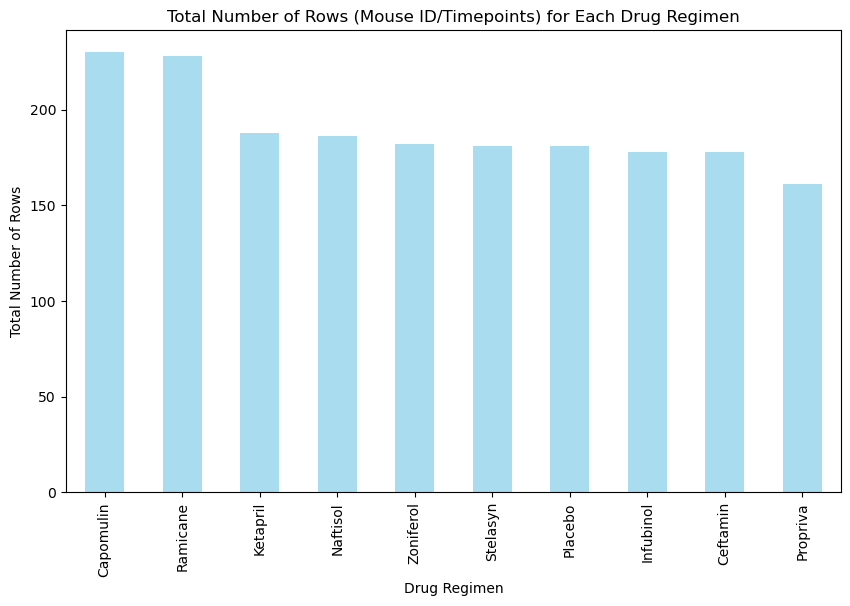

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = full_data_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='skyblue', alpha=0.7, figsize=(10, 6))
# Set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
# Display the plot
plt.show()

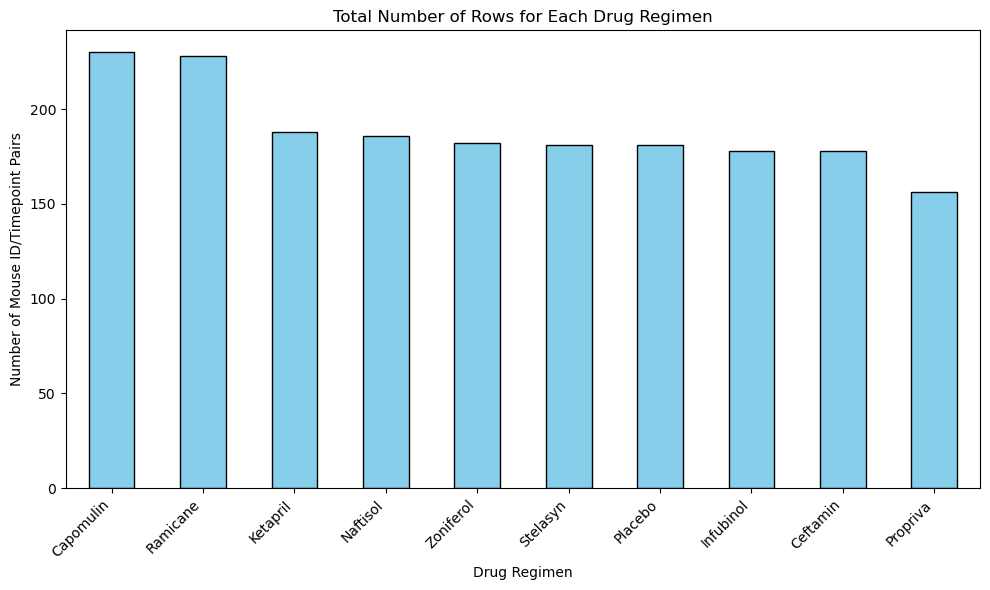

In [154]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoint Pairs')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

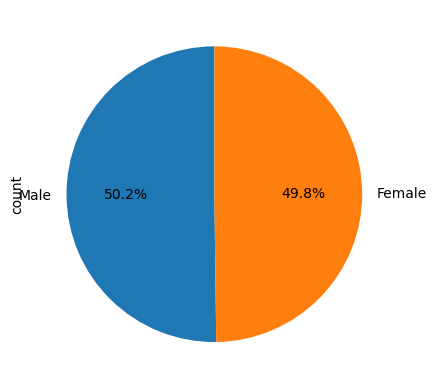

In [159]:

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset=['Mouse ID', 'Sex'])

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using Pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=False)

# Make the pie chart
plt.show()

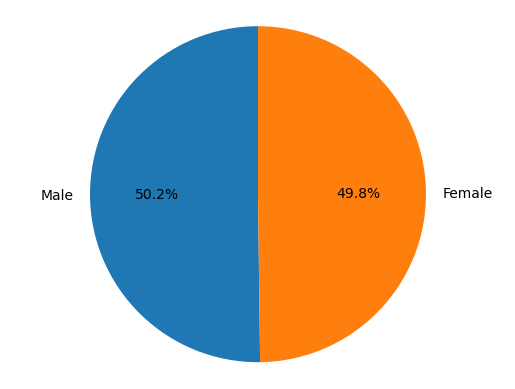

In [161]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_counts = unique_mice['Sex'].value_counts()

# Create the pie chart using Matplotlib's pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints_df = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Define the treatment regimens of interest
regimens_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for these regimens
filtered_df = last_timepoints_df[last_timepoints_df['Drug Regimen'].isin(regimens_of_interest)]

# Display the filtered DataFrame
print(filtered_df.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
3     a275         45           62.999356                 3     Ceftamin   
6     a411         45           38.407618                 1     Ramicane   
7     a444         45           43.047543                 0     Ramicane   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
3  Female          20          28  
6    Male           3          22  
7  Female          10          25  


In [167]:
tumor_volumes = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in regimens_of_interest:
    # Locate rows for each treatment regimen and get the tumor volumes
    treatment_data = last_timepoints_df[last_timepoints_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset
    tumor_volumes.append(treatment_data)

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    # Print outliers information
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} - Outliers: {outliers.values}")


Capomulin - Outliers: []
Ramicane - Outliers: []
Infubinol - Outliers: [36.3213458]
Ceftamin - Outliers: []


In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
